27 / Noviembre / 2023

## **Modelo Presa-Depredador**

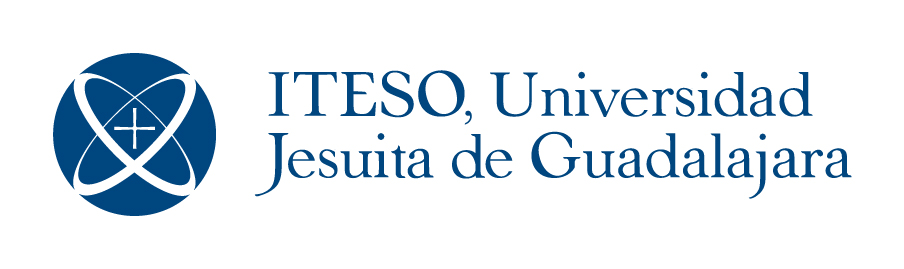

## **Integrantes del Equipo**
- Diego Lozoya Morales / diego.lozoya@iteso.mx / 745345
- Luis Eduardo Jiménez del Muro / eduardo.jimenez@iteso.mx / 746484
- Ivanna Herrera Ibarra / ivanna.herrera@iteso.mx / 744614

## **Objetivo general**
Resolver el sistema de ecuaciones diferenciales de Lokta-Volterra (modelo presa-depredador) dadas ciertas condiciones iniciales.

## **Objetivos específicos a alcanzar**
- Plantear el modelo con un enfoque donde las presas sean "conejos" y los depredadores sean "lobos".
- Por medio de las funciones "solve_ivp" resolver el sistema con base a las condiciones iniciales, con una simulación de 20 años.
- Representar la solución gráficamente.
- Conocer la cantidad de presas y depredadores en un tiempo determinado.

## **Modelo que representa el problema**

Este problema es resuelto con un sistema de ecuaciones diferenciales, las cuales son:

- Ecuación para la población de presas: $\frac{dx}{dr} = ax - bxy$
- Ecuación para la población de depredadores: $\frac{dy}{dr} = - cy + dxy$

En donde:

- $x$ = Número de presas.
- $y$ = Número de depredadores.
- $a$ = Tasa de crecimiento de la presa durante la ausencia de los depredadores.
- $b$ = Éxito del depredador en su caza (afecta a la población de la presa).
- $c$ = Tasa de disminución de los depredadores en la ausencia de las presas (Por eso se escribe negativa).
- $d$ = Éxito del depredador en su caza (afecta a la población del depredador debido a la disminución de la presa).



## **Solución**

In [2]:
from scipy.integrate import solve_ivp, odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

En primer lugar tenemos que definir las variables de las fórmulas planteadas anteriormente.

Ya que queremos simmular 20 años, con un cambio mensual, nuestro espacio de tiempo irá desde 0 hasta 240 meses.

Por otra parte la variable "a" tiene el valor de 0.1, es decir que las presas aumentan un 10% de manera mensual. La variable "b" equivale a 0.02, es decir que las presas disminuyen en 2% mediante la caza. "c" es la tasa de decremento de depredadores en un 30%. Y finalmente hay una disminución del 1% mensual de depredadores por falta de presas, representada por "d".

Además, definimos un valor inicial de 50 presas y 5 depredadores, con el cual se comenzará a realizar la simulación.

In [3]:
tspan = [0, 240] #Tiempo

a = 0.1 #Aumentan 0.1 presas por mes
b = 0.02 # 0.02 de la presa por mes es cazada, por lo tanto, disminuye la población de presa
c = 0.3 #Disminuyen 0.3 depredadores por mes
d = 0.01 # 0.01 de los depredadores disminuyen debido a que la presa disminuye

presa = 50 #Cantidad inicial de la presa
depredador = 5 #Cantidad inicial del depredador

Una vez habiendo definido las variables podemos utilizar una función que reciba como parámetros todo lo definido, y nos entregue la ecuación de la evolución de las poblaciones de presa y depredador.

In [4]:
x0 = np.array([presa, depredador]) # Vector con las condiciones iniciales

def f(t, X, a, b, c, d): #Sistema de ecuaciones diferenciales
    dx = a*X[0] - b*X[0]*X[1]
    dy = -c*X[1] + d*X[0]*X[1]
    return dx, dy

sol = solve_ivp(f, tspan, x0, args=(a, b, c, d), max_step=0.1)
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  2.400e+02  2.400e+02]
        y: [[ 5.000e+01  4.999e+01 ...  1.890e+01  1.890e+01]
            [ 5.000e+00  5.101e+00 ...  8.765e+00  8.765e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 14408
     njev: 0
      nlu: 0

Una vez teniendo la simulación hecha, decidimos graficar los resultados de la evolución del crecimiento de las presas, en comparación con los depredadores. De esta manera es mucho más sencillo comparar el cambio entre ambos grupos.

Text(0.5, 0, 'Tiempo')

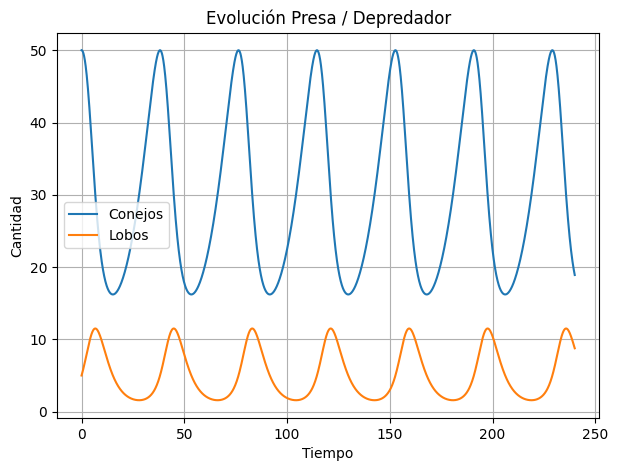

In [5]:
plt.figure(figsize=(7,5))
plt.title("Evolución Presa / Depredador")
plt.plot(sol.t, sol.y[0], label="Conejos")
plt.plot(sol.t, sol.y[1], label="Lobos")
plt.grid()
plt.legend(loc="best")
plt.ylabel("Cantidad")
plt.xlabel("Tiempo")

## **Resultados**

In [ ]:
print("La evolución de las presas presentó un máximo de población de " + str(round(max(sol.y[0]))) + " ejemplares, mientras que presentó un mínimo de " + str(round(min(sol.y[0]))) + " ejemplares.")
print("La evolución de los depredadores presentó un máximo de población de " + str(round(max(sol.y[1]))) + " ejemplares, mientras que presentó un mínimo de " + str(round(min(sol.y[1]))) + " ejemplares.")

La evolución de las presas presentó un máximo de población de 50 ejemplares, mientras que presentó un mínimo de 16 ejemplares.
La evolución de los depredadores presentó un máximo de población de 12 ejemplares, mientras que presentó un mínimo de 2 ejemplares.


## **Conclusiones**

- El crecimiento en la población de presas es inverso al de los depredadores.
- Por los parámetros definidos, nunca podrán superar los depredadores a las presas.


## **Bibliografía**
- Asencio Oganician, J. A. (2017). Modelo depredador-presa de Volterra-Lotka. https://riull.ull.es/xmlui/bitstream/handle/915/6217/Modelo%20depredador-presa%20de%20Volterra-Lotka.pdf